La estructura del notebook consiste simplemente en 4 secciones donde se abordan las preguntas 1, 2, 3, 4 y 5, estas dos últimas en conjunto.

Las librerías a utilizar se muestran en la siguiente celda, en caso de instalar una, basta con ocupar el comando *pip* o instalar de la manera que prefiera.

Desarrollado por David Molina P. 01-01-2023.

In [189]:
import pandas as pd # Manejo de datos
import numpy as np  # Manejo de arrays
import matplotlib.pyplot as plt # Visualización
import sqlite3 # Sql
import lxml.etree as etree
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from sklearn.preprocessing import minmax_scale

pd.set_option('display.max_columns', 500) # Para poder visualizar todas las columnas

import warnings
warnings.filterwarnings("ignore") # Se eliminan las alertas para una mejor lectura del notebook

# Pregunta 1
*Adjunto va un archivo .sqlite, comienza por crear una base de datos con este archivo y familiarízate con la
data.*

Se utilizará la librería sqlite3, la cual permitirá establecer una conexión con la base de datos y realizar querys en el mismo jupyter notebook, de esta manera se podrán responder todas las preguntas en este mismo archivo.

El primer paso es establecer una conexión con la base de datos y definir un cursor.

In [190]:
# Para que no tengan que clonar todo el repositorio, se importa de manera local
database_path = "C:/Users/xdavi/OneDrive/Desktop/database.sqlite"
con = sqlite3.connect(database_path)

# definición del cursor
cur = con.cursor()

Para poder familiarizarse con la base de datos se realiza la siguiente consulta con el objetivo de observar el nombre de las tablas.

In [191]:
cur.execute("""SELECT name FROM sqlite_master  
  WHERE type='table';""")
cur.fetchall()

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

**Observación:** Se puede notar que existen 7 tablas, las cuales probablemente estén relacionadas unas a otras (Player con Player_Attributes por ejemplo) por lo que en paralelo se construirá un modelo Entidad-Relación (se mostrará al final de la pregunta) que permita visualizar de mejor manera la base de datos.

Teniendo el nombre de las tablas es posible realizar consultas, por lo que se explorará cada tabla con el fin de familiarizarse con la base de datos. Pero, como se notó en la consulta anterior, el formato de cómo se muestra no es muy amigable, por lo tanto se definirá la siguiente función:

**Query**: 

Recibe una SQL Query en formato (str) y retorna un dataframe de pandas correspondiente a tal consulta. Se exhibe un ejemplo en la siguiente celda.

In [192]:
def query(consulta: str):
    df = pd.read_sql(consulta, con)
    return df
query("SELECT * FROM sqlite_sequence")

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


Se puede notar que la tabla **sqlite_sequence** contiene una columna "name" la cual contiene el nombre de las tablas y otra columna denominada "seq" la cual no es posible establecer qué significa, se podría buscar en internet la base de datos, y encontrar desarrollos realizados anteriormente, sin embargo:

**Durante todo el trabajo no se consultarán fuentes externas, por ejemplo, buscar trabajos ya realizados con esta base datos. Esto con el objetivo de simular un caso real, donde no necesariamente se posea tal información**

Continuamos explorando el resto de tablas...

##### Player

In [193]:
df = query("SELECT * FROM Team")
print(df.shape)
df

(299, 5)


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


Esta tabla contiene información demográfica acerca de cada jugador (Fecha de nacimiento, Altura, y peso) además de identificadores.

##### Player_Attributes

In [194]:
query("SELECT * FROM Player_Attributes LIMIT 5")

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,63,41,45,54,48,65,66,69,6,11,10,8,8
3,4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,43,70,60,43,50,44,38,63,48,60,64,59,46,65,54,58,54,76,34,62,40,44,53,47,62,63,66,5,10,9,7,7
4,5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,43,70,60,43,50,44,38,63,48,60,64,59,46,65,54,58,54,76,34,62,40,44,53,47,62,63,66,5,10,9,7,7


Se puede notar que esta tabla posee información acerca de las habilidades que tiene cada jugador para una fecha en especifico (*date*), por ejemplo, la precisión al cabecear (heading_accuracy) o el control del balón (ball_control). Adicionalmente existen las llaves *player_fifa_api_id* *player_api_id* que nos ayudará a cruzar las tablas.

##### Country

In [195]:
query("SELECT * FROM Country")

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Esta tabla consiste simplemente en el identificador de cada país y su respectivo nombre.

##### League

In [196]:
query("SELECT * FROM League")

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


Esta tabla contiene simplemente el identificador de la liga, el id del país al que pertenece y el nombre de la liga. Notar que el identificador de la liga coincide con el del país correspondiente.

##### Team

In [197]:
query("SELECT * FROM Team")

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


Esta tabla corresponde a clubes de futbol, con sus identificadores, el nombre completo y el nombre abreviado.

In [198]:
query("SELECT * FROM Team_Attributes LIMIT 5")

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Esta tabla nos da información acerca de cada equipo de futbol, la cual corresponde a sus características de juego, como la presión defensiva (defencePressure). Cabe destacar que existe una columna *date* la cual probablemente nos indica en qué día exactamente el equipo tiene tales características.

##### Match

In [199]:
query("SELECT * FROM Match LIMIT 5")

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,None,None,None,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,None,None,None,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,None,None,None,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,None,None,None,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

Por ultimo, está la tabla Match, la cual da información acerca de los partidos jugados, como la cantidad de goles del local y visitante, así como también los jugadores que disputaron el partido.

##### Diagrama relacional

Con esta información en mano, es posible construir el **diagrama relacional** de la base de datos, *PK* representa a la llave primaria, y *FK* a las llaves foráneas. No se escriben el resto de las columnas de las tablas debido a la cantidad de ellas, sin embargo se puede hacer una idea por el nombre de las tablas correspondientes.

![alt text](SoccerChallengeDiagram.drawio.png)

# Pregunta 2
*Las tablas de Match, League, Country y Team tiene toda la información para describir un partido
detalladamente. Crea una query SQL para obtener la información detallada por partido uniendo las tablas
Match, League, Country y Team.*

Para lograr lo anterior, se utiliza la función *query* definida en la pregunta anterior, y se utiliza además el diagrama relacional, el cual nos sirve para poder unir las tablas.

Se utilizan todas las columnas de la tabla Match, y de las tablas League, Country y Team, se obtiene solamente el nombre de la liga, el país y el equipo respectivamente, pues el resto de columnas o bien es redundante (Abreviatura del nombre del equipo por ejemplo) o ya está disponible en la tabla Match (los ids).

Se utiliza también el operador INNER JOIN, con el objetivo de tener toda la información disponible.

Se guarda la consulta como una pandas dataframe llamado **Match**.

In [200]:
Match = query("""
      SELECT Match.*, League.name as league_name, Country.name as country_name, Home_Team.team_long_name as home_team_name,
      Away_Team.team_long_name as away_team_name
      
      FROM Match
      INNER JOIN League on Match.league_id=League.id
      INNER JOIN Country on Match.country_id = Country.id
      INNER JOIN Team Home_Team on Match.home_team_api_id = Home_Team.team_api_id
      INNER JOIN Team Away_Team on Match.away_team_api_id = Away_Team.team_api_id
      """)

# Columnas a considerar, se eliminan las que no se logró reconocer qué columnas eran
cols = [col for col in Match.columns if not col in "B365H	B365D	B365A	BWH	BWD	BWA	IWH	IWD	IWA	LBH	LBD	LBA	PSH	PSD	PSA	WHH	WHD	WHA	SJH	SJD	SJA	VCH	VCD	VCA	GBH	GBD	GBA	BSH	BSD	BSA"]
Match = Match[cols]
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège


# Pregunta 3
*¿Qué insights ves en la información detallada del partido?*

Para la realización de esta pregunta se listarán las columnas que sean relevantes con respecto al partido , con su respectiva descripción, en caso de que el nombre de la columna no sea lo suficientemente claro, se ocuparán los datos para deducir qué significa. Y finalmente se dará una conclusión acerca de esta pregunta.

* *date*: Corresponde a la fecha en la cual se jugó el partido. Esta es una feature importante, pues si nos interesa saber la cantidad de goles que recibió el arquero X, es necesario tener tal columna.
* *{home,away}_team_api_id*: Corresponde a los identificadores del equipo local y visitante respectivamente.
* *{home, away}_team_goal*: Cantidad de goles que realizó el equipo local y visitante respectivamente.
* *{home, away}_player{Xi}*: La posición horizontal del jugador del equipo local/visitante con $i\in \{1,\dotsc,11\}$- 
* *{home, away}_player{Yi}*: La posición vertical del jugador del equipo local/visitante con $i\in \{1,\dotsc,11\}$.
* *{home, away}_player{i}*: El id del jugador (player_api_id en la tabla Player) local y visitante respectivamente con $i\in \{1,\dotsc,11\}$.
* *goal*: Información de los goles en formato XML.
* *shoton*: Información de los tiros (shot) al arco (on) también en formato XML.
* *shotoff*: Información de los tiros (shot) fuera del arco (on) también en formato XML.
* *foulcommit*: Información de las faltas cometidas (XML).
* *card*: Tarjetas amarillas y rojas (XML).
* *cross*: Cruces (pases largos) (XML).
* *corner*: Tiros de esquina (XML).
* *possession*: Posesión del balón (XML).


##### *{home, away}_player{Xi,Yi}:* Posición de los jugadores
Para verificar esto, se utilizará la información de algunos equipos conocidos (FC Barcelona, por ejemplo) y se escogerá el último partido disponible, y se realizará un grafico de la posición de los jugadores, junto con su nombre (disponible en la tabla Player)

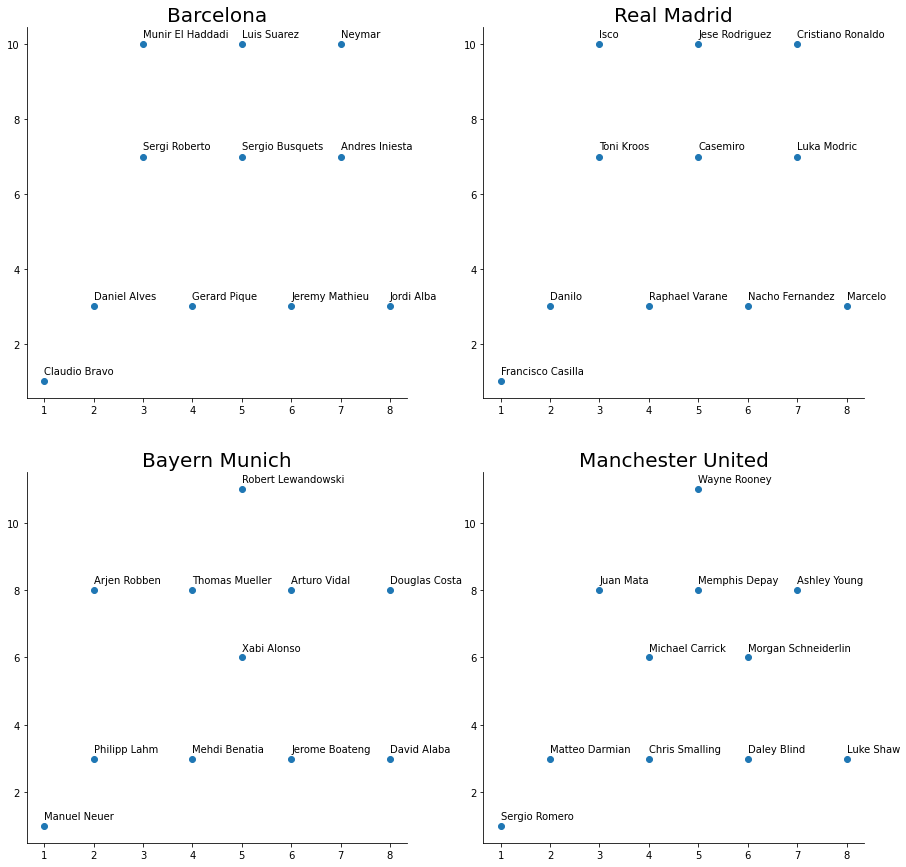

In [201]:
"""
get_X_Y_names:
Recibe: team_name: Nombre del equipo de futbol (Puede ser una aproximación, no necesariamente el nombre completo)
Retorna:
- X: Posición en el eje x de los jugadores (list)
- Y: Posición en el eje y de los jugadores (list)
- names: Nombre de los jugadores (list)
"""
def get_X_Y_names(team_name: str):
    # Información del último partido de "team_name"
    df = query("""
        SELECT * FROM Match
        WHERE home_team_api_id IN (SELECT team_api_id FROM Team WHERE team_long_name LIKE "%{}%")
        ORDER BY season DESC LIMIT 1
        """.format(team_name))
    # Columnas de las posiciones horizontales (X) y verticales (Y)
    X_positions = ["home_player_X"+str(i+1) for i in range(11)]
    Y_positions = ["home_player_Y"+str(i+1) for i in range(11)]

    # id de los jugadores
    id_positions = ["home_player_"+str(i+1) for i in range(11)]

    # id, player_name (para el gráfico)
    player_info = query("SELECT player_api_id, player_name FROM Player")
    # Agregamos los nombres de los jugadores
    names = df[id_positions].melt().merge(player_info, how="left", left_on="value", right_on="player_api_id")["player_name"]

    # Gráfico
    X = df[X_positions].T.to_numpy()
    Y = df[Y_positions].T.to_numpy()
    return X, Y, names

# Gráfico
fig, ax = plt.subplots(2,2 ,figsize=(15,15))
ax = ax.flatten()
# Equipos a considerar
Teams = ["Barcelona", "Real Madrid", "Bayern Munich", "Manchester United"]
for team_number, team in enumerate(Teams):
    X, Y, names = get_X_Y_names(team)
    ax[team_number].scatter(X, Y)
    for i, txt in enumerate(names):
        # Se ajusta la posición de los nombres
        if i>=1:
                ax[team_number].annotate(txt, (X[i], Y[i]+0.2))
        else:
                ax[team_number].annotate(txt, (X[i], Y[i]+0.2))
        ax[team_number].spines['top'].set_visible(False)
        ax[team_number].spines['right'].set_visible(False)
        ax[team_number].set_title(team, fontsize=20)


Se puede notar que las posiciones horizontalmente están invertidas (Dani Alves juega de lateral derecho históricamente) para solucionar lo anterior, simplemente se puede considerar -Posición en el eje X: Para efectos del modelamiento de la solución, no afecta este inconveniente, de igual manera se mostrará el gráfico realizando la transformación (multiplicar por -1 la posición):

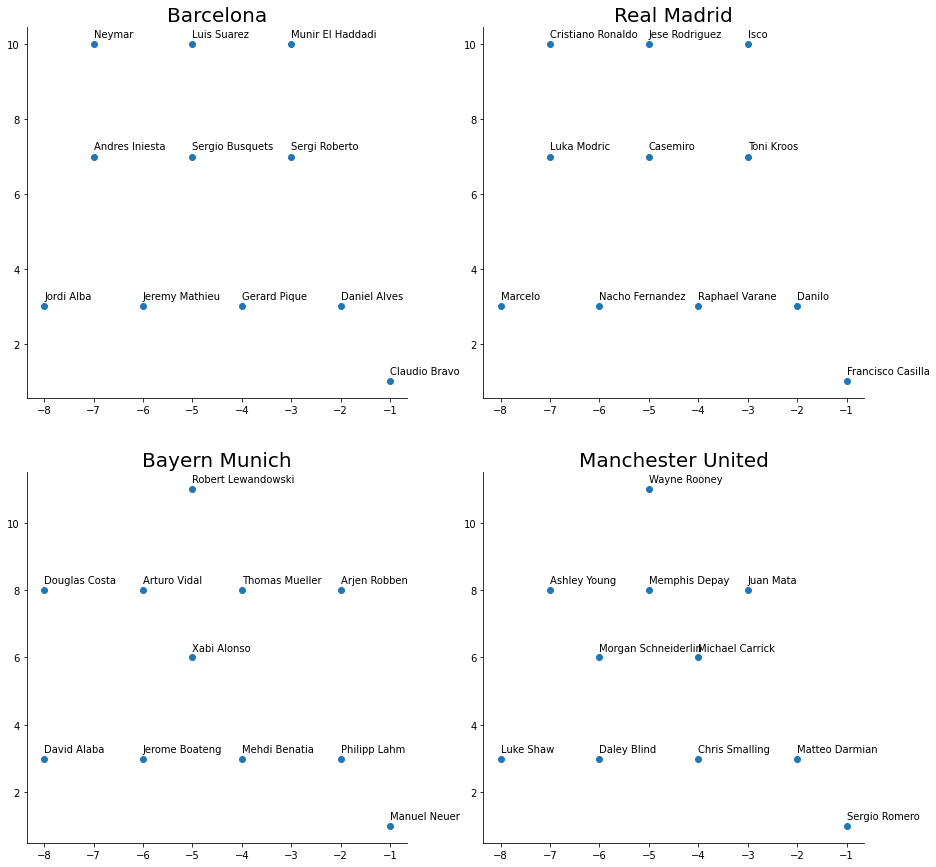

In [202]:
fig, ax = plt.subplots(2,2 ,figsize=(15,15))
ax = ax.flatten()
Teams = ["Barcelona", "Real Madrid", "Bayern Munich", "Manchester United"]
for team_number, team in enumerate(Teams):
    X, Y, names = get_X_Y_names(team)
    X = -X
    ax[team_number].scatter(X, Y)
    for i, txt in enumerate(names):
        if i>=1:
                ax[team_number].annotate(txt, (X[i], Y[i]+0.2))
        else:
                ax[team_number].annotate(txt, (X[i], Y[i]+0.2))
        ax[team_number].spines['top'].set_visible(False)
        ax[team_number].spines['right'].set_visible(False)
        ax[team_number].set_title(team, fontsize=20)

Acá se puede notar que las posiciones horizontales calzan.

##### *{home_away}_team_goal*: Cantidad de goles que realizó el equipo local y visitante respectivamente:

A partir de la siguiente consulta, se ve que el Young Boys (home_team) tiene home_team_goal = 4, y FC Basel (away team) tiene away_team_goal = 3. Es decir, si lo dicho en un principio es cierto, el resultado debería ser 4-3 a favor de Young Boys.

Lo cual se valida buscando el resultado del partido en internet: https://el.soccerway.com/matches/2015/09/23/switzerland/super-league/bsc-young-boys-bern/fc-basel/2048205/

In [203]:
Match[Match.match_api_id==1992095]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,274787.0,492132.0,108451.0,25815.0,94553.0,384376.0,598355.0,36785.0,45174.0,302079.0,71764.0,156175.0,95216.0,172768.0,22834.0,458806.0,207234.0,25772.0,40274.0,34035.0,41726.0,527103.0,None,None,None,None,None,None,None,None,Switzerland Super League,Switzerland,BSC Young Boys,FC Basel


##### *goal*: Información de los goles.
Para poder procesar esta columna, primero notar a través del siguiente ejemplo que corresponde a datos del tipo XML.

In [204]:
query("select * from match where goal is not null limit 1")["goal"].iloc[0]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>'

Debido a lo anterior, se define la función:

In [205]:
"""
xml_to_df

Recibe: xml_column: Una columna de un pandas dataframe, la cual sus elementos son un string del tipo XML
Retorna: Un pandas dataframe, conteniendo la información de xml_column
Se exhibe un ejemplo con el útlimo partido del FC Barcelona
"""
def xml_to_df(xml_column):
    data = []

    # Se itera sobre la columna
    for i, xml_data in enumerate(xml_column):
        # Raiz
        root = etree.fromstring(xml_data)

        # Se itera sobre cada valor
        for value in root:
            # Se crea un diccionario, que representa una fila
            row = {}
            for child in value:
                row[child.tag] = child.text
            row["match_api_id"] = df.match_api_id.iloc[i]
            # Se agrega a la lista de datos
            data.append(row)

    # Se crea el pandas dataframe
    data = pd.DataFrame(data)
    return data
df = query("""select * from match where goal is not null and home_team_api_id in (select team_api_id from team where team_long_name LIKE "%Barcelona%")
           and home_team_goal>0 and away_team_goal>0
order by date desc limit 1""")
xml_to_df(df["goal"])

,comment,stats,event_incident_typefk,coordinates,elapsed,player1,sortorder,team,id,n,type,goal_type,match_api_id,elapsed_plus,player2,subtype
0,o,None,115,None,26,25773,2,8634,5510772,275,goal,o,2030481,NaN,NaN,NaN
1,n,None,393,None,45,428947,4,10267,5510897,271,goal,n,2030481,1,75307,shot
2,n,None,393,None,63,30981,3,8634,5511089,389,goal,n,2030481,NaN,150739,shot


Se puede notar que existe varia información acerca de los goles. Para descubrir qué significa, se seguirán los siguientes pasos:

* Se utilizará el ejemplo anterior para encontrar qué significa player2
* Se extraerá toda la información de los goles, utilizando la función *xml_to_pdf*
* Se buscará cuáles son los diferentes tipos de gol
* Se buscará el partido con más tipos de goles diferentes, y se buscará en internet lo sucedido en tal partido.
* Se realizará algo similar a lo anterior para deducir los tipos de goles restantes

In [206]:
# Partido del FC Barcelona
# match_api_id obtenido de la consulta anterior
Match[Match.match_api_id==2030481]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
24440,24441,21518,21518,2015/2016,33,2016-04-17 00:00:00,2030481,8634,10267,1,2,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,4.0,6.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,8.0,8.0,11.0,37421.0,212472.0,37482.0,38818.0,150739.0,25773.0,154257.0,30955.0,30981.0,40636.0,19533.0,96613.0,35324.0,184999.0,192770.0,40139.0,75307.0,74747.0,40148.0,428947.0,361770.0,193869.0,<goal><value><comment>o</comment><stats><owngo...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>73</comment><stats...,Spain LIGA BBVA,Spain,FC Barcelona,Valencia CF


In [207]:
# Player1 y player2 del segundo gol del partido
query("select * from player where player_api_id in (75307,428947)")

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,2158,75307,Daniel Parejo,189513,1989-04-16 00:00:00,180.34,165
1,9494,428947,Santi Mina,212623,1995-12-07 00:00:00,177.80,157


La información del partido se encuentra en el siguiente enlace: https://espndeportes.espn.com/futbol/comentario?juegoId=433655
Al final del analisis se mostrará qué significa cada columna


In [208]:
# Acá se obtiene la información de todos los goles y se guarda como la variable *data*
df = query("""select * from match where goal is not null""")
data = xml_to_df(df["goal"])
data.head()

,comment,stats,event_incident_typefk,elapsed,player2,subtype,player1,sortorder,team,id,n,type,goal_type,match_api_id,elapsed_plus,del,coordinates
0,n,None,406,22,38807,header,37799,5,10261,378998,295,goal,n,489042,NaN,NaN,NaN
1,n,None,393,24,24154,shot,24148,4,10260,379019,298,goal,n,489042,NaN,NaN,NaN
2,n,None,393,4,39297,shot,26181,2,9825,375546,231,goal,n,489043,NaN,NaN,NaN
3,n,None,407,83,30889,distance,30853,0,8650,378041,344,goal,n,489044,NaN,NaN,NaN
4,n,None,393,4,36394,shot,23139,2,8654,376060,244,goal,n,489045,NaN,NaN,NaN


In [209]:
# Tipos de goles
data.value_counts("goal_type")

goal_type
n      34521
p       2975
o       1116
npm      736
dg       580
rp        17
psm        1
dtype: int64

In [210]:
# Partidos con más tipos de goles diferentes
data.groupby("match_api_id")["goal_type"].nunique().sort_values(ascending=False)

match_api_id
2030158    5
1024627    4
659139     4
1983480    4
2060347    4
          ..
1474126    1
1474125    1
489042     1
1474306    0
1712583    0
Name: goal_type, Length: 13224, dtype: int64

In [211]:
# Goles en tal partido
data[data.match_api_id==2030158]

,comment,stats,event_incident_typefk,elapsed,player2,subtype,player1,sortorder,team,id,n,type,goal_type,match_api_id,elapsed_plus,del,coordinates
39601,o,None,115,19,NaN,NaN,213653,1,9864,4916136,133,goal,o,2030158,NaN,NaN,NaN
39602,n,None,6,33,NaN,volley,361770,3,10267,4916337,215,goal,n,2030158,NaN,NaN,NaN
39603,npm,NaN,348,39,NaN,saved_back_into_play,37450,0,9864,4916423,236,goal,npm,2030158,NaN,NaN,NaN
39604,dg,NaN,298,75,NaN,shot,241825,1,10267,4916716,461,goal,dg,2030158,NaN,NaN,NaN
39605,p,None,20,89,NaN,NaN,75307,0,10267,4916818,531,goal,p,2030158,NaN,NaN,NaN


In [212]:
# Corresponde al partido de valencia vs Malaga el 2015-10
Match[Match.match_api_id==2030158]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
24543,24544,21518,21518,2015/2016,8,2015-10-17 00:00:00,2030158,10267,9864,3,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,489240.0,361757.0,184999.0,361710.0,391058.0,361770.0,74747.0,428947.0,75307.0,46384.0,241825.0,25563.0,104382.0,18520.0,41707.0,41470.0,683450.0,112758.0,432591.0,37450.0,215927.0,213653.0,<goal><value><comment>o</comment><stats><owngo...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>62</comment><stats...,Spain LIGA BBVA,Spain,Valencia CF,Málaga CF


In [213]:
# Gol rp en un partido 
data[(data.goal_type=="rp")].head(1)

,comment,stats,event_incident_typefk,elapsed,player2,subtype,player1,sortorder,team,id,n,type,goal_type,match_api_id,elapsed_plus,del,coordinates
1321,rp,NaN,486,59,NaN,NaN,NaN,1,8455,891598,147,goal,rp,658842,NaN,NaN,NaN


In [214]:
# West Ham vs Chelsea
Match[Match.match_api_id==658842]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
2201,2202,1729,1729,2009/2010,18,2009-12-20 00:00:00,658842,8654,8455,1,1,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,4.0,6.0,5.0,1.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,5.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,5.0,7.0,7.0,9.0,11.0,11.0,36374.0,36394.0,24744.0,23818.0,26348.0,37169.0,24223.0,34590.0,109898.0,41475.0,31020.0,30859.0,31306.0,30627.0,30911.0,38834.0,30699.0,30631.0,30679.0,30630.0,30822.0,31906.0,<goal><value><comment>p</comment><stats><penal...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>42</comment><event...,England Premier League,England,West Ham United,Chelsea


En el siguiente enlace https://www.espn.com.co/futbol/comentario?juegoId=433904 aparece la información del partido del Valencia minuto a minuto, y en https://www.espn.com.uy/futbol/comentario?juegoId=270024 el partido del Chelsea, por lo que se puede concluir que:
* elapsed: Minuto del gol
* player1: id del jugador que realizó el gol.
* player2: id del jugador que realizó la asistencia del gol.
* "o": Auto gol.
* "n": Gol.
* "npm": Penal fallado.
* "dg": Offside.
* "p": Gol de penal.
* "rp": Gol de penal (pegando en el palo primero).

In [215]:
# Gol del tipo psm
data[(data.goal_type=="psm")]

,comment,stats,event_incident_typefk,elapsed,player2,subtype,player1,sortorder,team,id,n,type,goal_type,match_api_id,elapsed_plus,del,coordinates
285,psm,NaN,181,45,NaN,NaN,30348,0,8462,538898,116,goal,psm,489229,2,NaN,NaN


In [216]:
Match[Match.match_api_id==489229]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
1834,1835,1729,1729,2008/2009,19,2008-12-26 00:00:00,489229,8462,8654,1,4,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36286.0,47418.0,34418.0,24216.0,40987.0,23285.0,24653.0,24373.0,38820.0,30830.0,30348.0,36374.0,30687.0,23818.0,37277.0,26348.0,109898.0,37169.0,24223.0,30966.0,33781.0,34543.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,England Premier League,England,Portsmouth,West Ham United


Con respecto al único partido donde hubo un gol del tipo "psm" no fue posible encontrar información, por lo que no se considerará en análisis posteriores, no implica un costo, pues solo existe un registro con ese tipo de gol.

##### shoton: Información de los tiros al arco
Se utilizará la función definida en la subsección anterior (xml_to_df)

In [217]:
# Acá se obtiene la información de todos los tiros al arco
df = query("""select * from match where shoton is not null""")
data = xml_to_df(df["shoton"])
data.head()

,stats,event_incident_typefk,elapsed,subtype,player1,sortorder,team,n,type,id,match_api_id,elapsed_plus,goal_type,del,coordinates,card_type
0,None,61,3,blocked_shot,24154,0,10260,253,shoton,378828,489042,NaN,NaN,NaN,NaN,NaN
1,None,154,7,header,24157,2,10260,258,shoton,378866,489042,NaN,NaN,NaN,NaN,NaN
2,None,153,14,shot,30829,1,10260,274,shoton,378922,489042,NaN,NaN,NaN,NaN,NaN
3,None,153,14,shot,30373,2,10260,279,shoton,378923,489042,NaN,NaN,NaN,NaN,NaN
4,None,137,17,distance,30373,3,10260,272,shoton,378951,489042,NaN,NaN,NaN,NaN,NaN


In [218]:
# Tipos de tiro al arco
data.value_counts(["subtype"])

subtype           
blocked_shot          31635
shot                  23048
distance              12961
header                 8097
big chance shot        5174
deflected              4005
direct_freekick        3422
volley                 1596
big chance header      1379
blocked_header          962
big chance blocked      538
big chance volley       299
bicycle_kick            296
indirect freekick       160
lob                     154
big chance bicycle       11
dtype: int64

En este caso el tipo de tiro se explica por si solo, y siguiendo la misma idea de la columna *goal* se concluye que player1 corresponde al id del jugador que realizó tal tiro.

##### shotoff: Información de los tiros fuera del arco
Se realiza lo analogo a lo realizado para la columna shoton

In [219]:
# Acá se obtiene la información de todos los tiros fuera arco
df = query("""select * from match where shotoff is not null""")
data = xml_to_df(df["shotoff"])
data.head()

,stats,event_incident_typefk,elapsed,subtype,player1,sortorder,team,n,type,id,match_api_id,elapsed_plus,del,card_type,coordinates
0,None,9,4,distance,30373,1,10260,264,shotoff,378835,489042,NaN,NaN,NaN,NaN
1,None,9,5,distance,37799,2,10261,257,shotoff,378845,489042,NaN,NaN,NaN,NaN
2,None,317,22,deflected,24228,3,10261,269,shotoff,378995,489042,NaN,NaN,NaN,NaN
3,None,9,31,distance,38807,0,10261,278,shotoff,379075,489042,NaN,NaN,NaN,NaN
4,None,47,34,header,24154,2,10260,281,shotoff,379111,489042,NaN,NaN,NaN,NaN


In [220]:
# Tipos de tiro fuera del arco
data.value_counts(["subtype"])

subtype            
distance               23110
shot                   22314
header                 15744
deflected               8033
direct_freekick         4240
big chance shot         4234
bad shot                4184
volley                  4117
post                    1946
crossbar                1935
big chance header       1481
miss_kick               1193
bicycle_kick             656
big chance volley        575
big chance post          547
big chance crossbar      380
lob                      255
indirect freekick        146
big chance bicycle        24
dtype: int64

De igual manera  el tipo de tiro se explica por si solo, y siguiendo la misma idea de la columna *goal* se concluye que player1 corresponde al id del jugador que realizó tal tiro.

##### foulcommit: Información de las faltas cometidas

In [221]:
# Acá se obtiene la información de todos los tiros fuera arco
df = query("""select * from match where foulcommit is not null""")
data = xml_to_df(df["foulcommit"])
data.head(5)

,stats,event_incident_typefk,elapsed,player2,player1,sortorder,team,n,type,id,match_api_id,subtype,elapsed_plus,card_type,del,coordinates,venue,injury_time
0,None,37,1,32569,25518,1,10261,267,foulcommit,378824,489042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,37,2,24157,30929,0,10261,277,foulcommit,378826,489042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,37,3,24148,29581,1,10261,254,foulcommit,378830,489042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,37,5,40565,30373,0,10260,256,foulcommit,378841,489042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,320,10,30829,29581,0,10261,275,foulcommit,378894,489042,pushing,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Tipos de tarjetas
data.value_counts(["card_type"])

card_type
y            13
r             1
dtype: int64

Se buscará in ejemplo de falta cometida con card_type = y, para ver si efectivamente corresponde a una tarjeta amarilla.

In [223]:
data[data.card_type=="y"]

,stats,event_incident_typefk,elapsed,player2,player1,sortorder,team,n,type,id,match_api_id,subtype,elapsed_plus,card_type,del,coordinates,venue,injury_time
6779,None,5,61,22764,23034,0,8667,349,foulcommit,657558,489382,serious_foul,NaN,y,NaN,NaN,NaN,NaN
25883,None,43,90,NaN,38994,3,10260,357,foulcommit,1202404,839875,NaN,3,y,NaN,NaN,NaN,NaN
26526,None,19,21,29581,30338,0,9879,235,foulcommit,1603837,1024173,from_behind,NaN,y,NaN,NaN,NaN,NaN
28085,None,19,39,24011,23782,0,8456,345,foulcommit,1845260,1024992,from_behind,NaN,y,NaN,NaN,NaN,NaN
36615,None,3,74,NaN,24952,2,9798,236,foulcommit,2526319,1229303,hands,NaN,y,NaN,NaN,NaN,NaN
40090,None,5,62,40565,32728,1,9850,317,foulcommit,2712426,1229464,serious_foul,NaN,y,NaN,NaN,NaN,NaN
89685,None,5,59,40176,30894,1,9823,353,foulcommit,682596,499613,serious_foul,NaN,y,NaN,NaN,NaN,NaN
124566,None,5,67,25598,30453,1,8686,316,foulcommit,639657,539859,serious_foul,NaN,y,NaN,NaN,NaN,NaN
127296,None,133,22,18880,30871,0,9885,213,foulcommit,890095,704641,penalty,NaN,y,NaN,NaN,NaN,NaN
182892,None,5,38,150250,163236,0,9864,255,foulcommit,974588,684989,serious_foul,NaN,y,NaN,NaN,NaN,NaN


In [224]:
# Partido
Match[Match.match_api_id==489382]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,country_name,home_team_name,away_team_name
2007,2008,1729,1729,2008/2009,34,2009-04-25 00:00:00,489382,8667,8650,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,23021.0,34430.0,34275.0,26066.0,38816.0,23034.0,30595.0,34437.0,23025.0,39073.0,23563.0,30660.0,37442.0,30617.0,22764.0,47547.0,30889.0,38818.0,37139.0,95327.0,24800.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><event_incident_typefk>123</even...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...,England Premier League,England,Hull City,Liverpool


In [225]:
# Player1 
query("select * from Player where player_api_id=23034")

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1937,23034,Craig Fagan,152677,1982-12-11 00:00:00,180.34,165


A partir de la informacion del partido (https://int.soccerway.com/matches/2009/04/25/england/premier-league/hull-city-afc/liverpool-fc/637259/commentary/) se concluye que:

* player1: id del jugador que recibió la tarjeta
* player2: jugador que recibió la falta

##### Card: Información de las tarjetas

In [226]:
# Acá se obtiene la información de todos los tiros fuera arco
df = query("""select * from match where card is not null""")
data = xml_to_df(df["card"])

In [227]:
data.head()

,comment,stats,event_incident_typefk,elapsed,card_type,subtype,player1,sortorder,team,n,type,id,match_api_id,elapsed_plus,del,goal_type
0,y,None,73,78,y,serious_fouls,24157,1,10260,342,card,379481,489042,NaN,NaN,NaN
1,y,None,73,82,y,serious_fouls,30362,1,10260,346,card,379503,489042,NaN,NaN,NaN
2,y,None,70,90,y,NaN,30829,1,10260,353,card,379547,489042,NaN,NaN,NaN
3,y,None,73,56,y,serious_fouls,37442,5,8650,327,card,377978,489044,NaN,NaN,NaN
4,y,None,25,90,y,stall_time,46621,3,8650,353,card,378060,489044,NaN,NaN,NaN


In [228]:
# Tipos de tarjetas
data.value_counts(["subtype"])

subtype             
serious_fouls           7680
Unsportsmanlike Cond    3643
verbal_abuse            2003
emergency_brake         1313
shirt_pull               750
stall_time               642
pushing                  545
hands                    531
advantage                469
diving                   451
violence                 396
kicked_ball_away         263
Removing Shirt           178
dtype: int64

Esta columna da simplemente más información acerca de la tarjeta, como por ejemplo el tipo de falta.

##### Corner: Información de los tiros de esquina

In [229]:
# Acá se obtiene la información de todos los tiros fuera arco
df = query("""select * from match where corner is not null""")
data = xml_to_df(df["corner"])

In [230]:
data.head()

,stats,event_incident_typefk,elapsed,subtype,player1,sortorder,team,n,type,id,match_api_id,elapsed_plus,del,spectators,coordinates
0,None,329,19,cross,38807,0,10261,280,corner,378960,489042,NaN,NaN,NaN,NaN
1,None,330,22,short,40565,0,10261,263,corner,378992,489042,NaN,NaN,NaN,NaN
2,None,329,22,cross,38807,4,10261,293,corner,378996,489042,NaN,NaN,NaN,NaN
3,None,329,48,cross,24154,2,10260,300,corner,379352,489042,NaN,NaN,NaN,NaN
4,None,329,51,cross,38807,0,10261,301,corner,379366,489042,NaN,NaN,NaN,NaN


In [231]:
# Tipos de tarjetas
data.value_counts(["subtype"])

subtype    
cross          42251
cross_right    17422
cross_left     15746
short           6526
short_left      3079
short_right     2652
dtype: int64

Esta columna da simplemente más información acerca de los tiros de esquina

##### Cross: Información acerca de los pases largos

In [232]:
# Acá se obtiene la información de todos los tiros fuera arco
df = query("""select * from match where cross is not null""")
data = xml_to_df(df["cross"])

In [233]:
data.head()

,stats,event_incident_typefk,elapsed,subtype,player1,sortorder,team,n,type,id,match_api_id,elapsed_plus,del,spectators,coordinates,goal_type
0,None,7,7,cross,30829,1,10260,265,cross,378863,489042,NaN,NaN,NaN,NaN,NaN
1,None,7,14,cross,24148,0,10260,255,cross,378921,489042,NaN,NaN,NaN,NaN,NaN
2,None,329,19,cross,38807,0,10261,280,corner,378960,489042,NaN,NaN,NaN,NaN,NaN
3,None,7,19,cross,30929,5,10261,292,cross,378970,489042,NaN,NaN,NaN,NaN,NaN
4,None,7,20,cross,24148,0,10260,259,cross,378978,489042,NaN,NaN,NaN,NaN,NaN


In [234]:
# Tipos de tarjetas
data.value_counts(["subtype"])

subtype
cross      284775
dtype: int64

Esta columna da simplemente más información acerca de los pases largos, como el minuto (elapsed) y el jugador que los ejecutó (player1), esto no se verificó en internet, pues se deduce a partir de la sintaxis y de lo que se ha estudiado hasta ahora.

##### Possession: Información acerca de la posesión del balón

In [235]:
# Acá se obtiene la información de todos los tiros fuera arco
df = query("""select * from match where possession is not null""")
data = xml_to_df(df["possession"])

In [236]:
data.head()

,comment,event_incident_typefk,elapsed,subtype,sortorder,awaypos,homepos,n,type,id,match_api_id,elapsed_plus,goal_type,card_type,injury_time,del,stats
0,56,352,25,possession,1,44,56,68,special,379029,489042,NaN,NaN,NaN,NaN,NaN,NaN
1,54,352,45,possession,4,46,54,117,special,379251,489042,1,NaN,NaN,NaN,NaN,NaN
2,54,352,70,possession,0,46,54,190,special,379443,489042,NaN,NaN,NaN,NaN,NaN,NaN
3,55,352,90,possession,1,45,55,252,special,379575,489042,5,NaN,NaN,NaN,NaN,NaN
4,65,352,27,possession,0,35,65,67,special,375608,489043,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# Tipos de tarjetas
data.value_counts(["subtype"])

subtype   
possession    34815
dtype: int64

Información acerca de la posesión del balon, (awaypos y homepos) en determinados momentos del partido (elapsed), nuevamente esta información se deduce a partir del sintaxis.

##### Conclusión
En general se puede decir que a partir de la información contenida en la tabla Match, se puede describir de buena manera un partido, pues es posible:

* Identificar el equipo local, visitante, y los respectivos jugadores.
* Identificar la posición de cada jugador.
* Identificar quién anotó los goles, y quien asistió, así como también información acerca de las faltas cometidas, pases largos y posesión del balón.

Si bien existe bastante información, esta se enfoca más en el aspecto ofensivo del juego (goles, asistencia, centros, tiros de esquina), y no en el aspecto defensivo, por ejemplo:

* Intercepciones.
* Despejes.
* Tiros de esquina ganados.

**Es decir, que a priori los jugadores ofensivos son más facilmente identificables a partir de esta información que los defensivos.**


# Pregunta 4 y 5
*Dado que queremos armar un equipo maravilloso nos interesa tener un perfil por cada jugador. Ocupa SQL
y/o Python para crear un Dataframe que tenga un jugador por fila con toda la información que creas
relevante*

*¿Qué insights ves en el perfil por jugador? ¿Qué data crees que es relevante para elegir a los mejores
jugadores?*

Esta pregunta decidí responderla en conjunto, pues prefiero primeramente mostrar qué tipos de datos son relevantes para elegir a los mejores jugadores, y posteriormente construir el perfil de cada jugador.

¿Qué data crees que es relevante para elegir a los mejores
jugadores?*
* En primer lugar, la posición del jugador, pues por ejemplo, no es posible evaluar de igual manera a un arquero que a un delantero, pues sus tareas son opuestas. Para lograr lo anterior, se utilizará la información de la posición de cada jugador disponible en la tabla Match (*home/away_player_X/Y*). Como un jugador puede jugar en diferentes posiciones dependiendo del partido, simplemente se utilizará la media de la posición por cada jugador, es decir la posición en que más veces ha jugado. Dentro de las posiciones y con el objetivo de simplificar el análisis se diferenciarán simplemente 4 posiciones:

* Arquero (ARQ).
* Defensa (DF).
* Mediocampista (MC).
* Delantero (DEL).

Esto es claramente mejorable, pues la labor de un delantero centro, es diferente a las de un delantero extremo, asi como también un lateral/defensa central, o un volante creador/defensivo.

Posteriormente se explicará cómo identificar cada posición.

Las métricas **que se crearán** para evaluar a cada jugador serán las siguientes, para la posición de arquero:

* goalsR_per_match $=\frac{goals}{matches} $ (Cantidad de goles recibidos dividido por el número de partidos).
* blocks_per_match $=\frac{blocks}{matches}$ (Cantidad de tiros bloqueados dividido por el número de partidos).

Para la posición de defensa:
* fouls_per_match $=\frac{fouls}{matches}$(Número de faltas cometidas dividido por la cantidad de partidos)
* goalsR_per_match

Para la posición de mediocampista:
* asst_per_match: $=\frac{assists}{matches}$ (Número de asistencias dividido por la cantidad de partidos)
* goalsR_per_match
* goals_per_match
* cross_per_match: $=\frac{crosses}{matches}$ (Número de pases largos dividido por la cantidad de partidos)
* foulsR_per_match: $\frac{fouls \; recibidos}{match}$ (Número de faltas recibidas dividido por la cantidad de partidos)

Para la posición de delantero:
* asst_per_match
* goals_per_match: Cantidad de goles realizados dividido por el numero de partidos
* precision: $=\frac{goals}{shoton}$ (Número de goles dividido por el numero de tiros, es decir, el porcentaje de tiros que son goles)
* foulsR_per_match

Para todos los jugadores se medirá la experiencia de acuerdo a la siguiente expresión:
$$log(matches)$$
con matches la cantidad de partidos disputados, esto básicamente, porque creo que llega un punto en que jugar más partidos ya no se adquiere experiencia.

Creo que este tipo de datos son relevantes para poder identificar qué tan bueno es un jugador, pues están alineados con las labores respectivas (tapar para un arquero), o bien hacer goles para un delantero. Además se cree relevante la experiencia que tiene un jugador. 

Para la construcción de todas estas características se crea la tabla **player** (pandas dataframe) que consiste simplemente en la tabla Player de la base de datos.

Simplemente se considerarán las columnas *player_api_id* y *player_name*. La edad, el peso y la estatura no se considerarán esta vez, pero puede ser una oportunidad de mejor.

In [238]:
player = query("select player_api_id, player_name from Player")

##### Posición:
Para poder estudiar las posiciones de los jugadores, se realizará un mapa de calor con todas las posiciones registradas hasta la fecha.

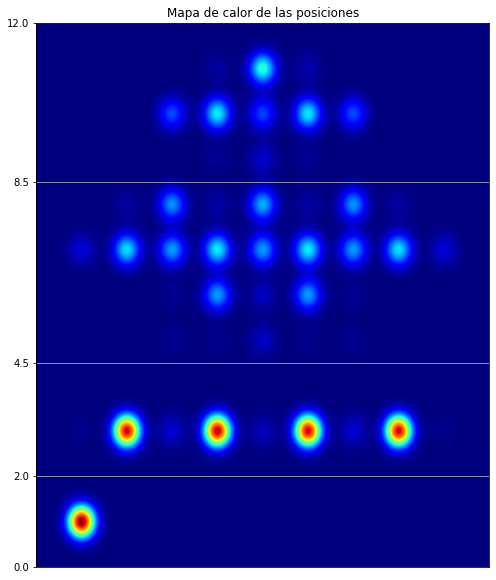

In [239]:
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range = [[0, 10], [0, 12]])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent
fig, ax = plt.subplots(1, figsize=(10,10))

s = 20
a = np.array([])
b = np.array([])
for i in range(11):
    # Local
    a1 = Match[["home_player_X"+str(i+1)]].dropna().to_numpy().flatten()
    b1 = Match[["home_player_Y"+str(i+1)]].dropna().to_numpy().flatten()   
    #Visita
    a2 = Match[["away_player_X"+str(i+1)]].dropna().to_numpy().flatten()
    b2 = Match[["away_player_Y"+str(i+1)]].dropna().to_numpy().flatten()
    
    a = np.append(a, a1)
    b = np.append(b,b1)
    
    a = np.append(a, a2)
    b = np.append(b,b2)
    
img, extent = myplot(a, b, s)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
ax.set_title("Mapa de calor de las posiciones")
ax.grid(alpha = 1)
ax.set_yticks([0,2,4.5,8.5,12]);
ax.set_xticks([]);

A partir de la componente vertical es posible identificar las zonas de cada posición:

* [0,2): Zona del arquero
* [2,4.5): Zona de los defensas
* [4.5,8.5): Medio Campo
* [8,5, 12): Delanteros

Por lo tanto, para identificar la posición de cada jugador, se buscará la posición vertical del último partido disputado por tal jugador, y se escogerá su posición de acuerdo a la partición anterior. 

Para realizarlo, se agrupan los datos según el identificador de cada jugador, y se escoge la media de las posiciones verticales (pues no necesariamente jugó siempre en la misma posición), requiere un poco más de desarrollo, pues existen 22 posiciones (11 posiciones para cada equipo, local o visita).

Se crea finalmente la tabla **y_position** (pandas dataframe) que contiene las columnas:

* player_api_id
* Y: posición vertical del jugador


In [240]:
y_position = pd.DataFrame([])

# Se itera sobre todas las posiciones diferentes
for i in range(11):
    # Se obtiene la posición los partidos de local
    y_i = Match.melt("home_player_"+str(i+1),value_vars="home_player_Y"+str(i+1))
    y_i.drop("variable", axis = 1, inplace=True)
    y_i.columns = ["player_api_id", "y_position"]
    y_position = pd.concat((y_position, y_i), axis = 0)
    # Se obtiene la posición los partidos de visita
    y_i = Match.melt("away_player_"+str(i+1),value_vars="away_player_Y"+str(i+1))
    y_i.drop("variable", axis = 1, inplace=True)
    y_i.columns = ["player_api_id", "y_position"]
    y_position = pd.concat((y_position, y_i), axis = 0)
    
y_position.dropna(inplace=True)
# Se escoge la última posición en la que jugó cada jugador
# y_position = y_position.groupby("player_api_id")["y_position"].apply(lambda x: x.mode()[0])
y_position_mean = y_position.groupby("player_api_id")["y_position"].mean()
y_position_mean = y_position_mean.reset_index(name="y_position")

In [241]:
# Se utiliza la sintaxis definida al comienzo de la pregunta
def f(x):
    if x<2:
        return "ARQ"
    elif x<4.5:
        return "DF"
    elif x<8.5:
        return "MC"
    elif x<=12:
        return "DEL"
y_position_mean.y_position = y_position_mean.y_position.apply(f)

Se une a la tabla player

In [242]:
player = player.merge(y_position_mean, how = "inner", on="player_api_id")
player

,player_api_id,player_name,y_position
0,505942,Aaron Appindangoye,DF
1,155782,Aaron Cresswell,DF
2,162549,Aaron Doran,MC
3,30572,Aaron Galindo,DF
4,23780,Aaron Hughes,DF
...,...,...,...
11055,26357,Zoumana Camara,DF
11056,111182,Zsolt Laczko,MC
11057,36491,Zsolt Low,DF
11058,35506,Zurab Khizanishvili,DF


##### Goles:
Primeramente se estudia la cantidad de información que existen acerca de los goles, y además se aprovecha de ver el del resto de columnas:

<AxesSubplot:>

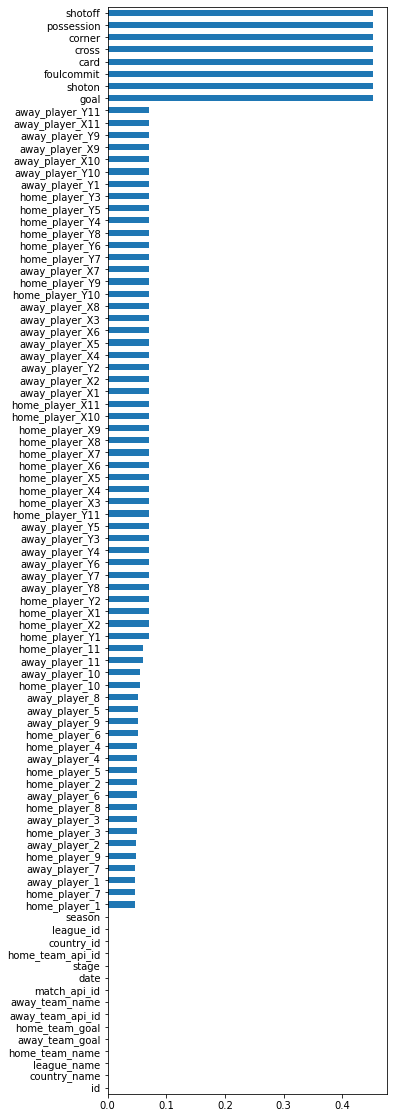

In [243]:
# Porcentaje de nulos por columna
plt.figure(figsize=(5,20))
(Match.isna().sum().sort_values()/Match.shape[0]).plot(kind="barh")

In [244]:
# Porcentaje de partidos donde no existe información de los goles, desagregado por liga
(Match[Match.goal.isna()]["league_name"].value_counts()/Match["league_name"].value_counts()*100).sort_values()

Spain LIGA BBVA               0.032895
Italy Serie A                 0.099437
France Ligue 1               33.355263
Netherlands Eredivisie       78.349673
Switzerland Super League     92.967651
Scotland Premier League      99.287281
Poland Ekstraklasa           99.635417
Belgium Jupiler League      100.000000
Portugal Liga ZON Sagres    100.000000
England Premier League             NaN
Germany 1. Bundesliga              NaN
Name: league_name, dtype: float64

Notar que las ligas de Holando, Suiza, Escocia, Polonia, Belgica y Portugal, presentan un alto porcentaje (mayor al 78%) de partidos sin información de los goles. Como estas ligas, no están dentro de las 5 mejores de europa, y el objetivo es encontrar los mejores jugadores, simplemente se filtrarán tales partidos:

Top 5 ligas europas: https://www.statista.com/study/64713/leading-football-leagues-in-europe/#:~:text=The%20Big%20Five%20consists%20of,and%20Ligue%201%20in%20France.


In [245]:
Match = Match.dropna(subset=["goal"])

<AxesSubplot:>

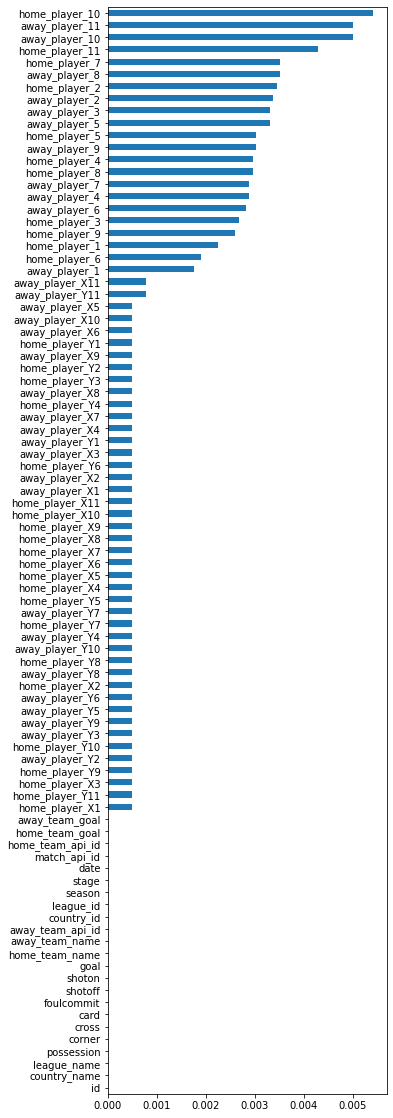

In [246]:
# Se realiza el mismo grafico
plt.figure(figsize=(5,20))
(Match.isna().sum().sort_values()/Match.shape[0]).plot(kind="barh")

Se puede notar que se eliminó la mayoría de los nulos a través del sencillo analisis, sin perder la oportunidad de detectar a los mejores jugadores. 

Habiendo realizado tal limpieza, se calculará *goals_per_match*, para ello:

* Se calculará la cantidad de partidos
* Se calculará la cantidad de goles
* Se creará la caracteristica

In [247]:
# Cantidad de partidos
# Simplemente se utiliza la tabla y_position, y se cuenta las apariciones de cada id
matches = y_position.groupby("player_api_id").size().reset_index(name="matches")
matches

,player_api_id,matches
0,2625.0,18
1,2752.0,81
2,2768.0,71
3,2770.0,16
4,2790.0,50
...,...,...
11055,744907.0,1
11056,746419.0,2
11057,748432.0,2
11058,750435.0,1


In [248]:
# Goles realizados
goals = xml_to_df(Match["goal"])
# Goles validos
goals = goals[goals.goal_type.isin(["n", "p", "rp"])]
goals = goals.groupby("player1").size().reset_index(name = "goals")
goals.columns = ["player_api_id","goals"]
goals.player_api_id = goals.player_api_id.astype("int")

In [249]:
# Goles recibidos (goalsR)
goalsR = pd.DataFrame([])

# Se itera sobre todas las posiciones diferentes
for i in range(11):
    # Se obtiene los goles recibidos de local para cada jugador
    y_i = Match.melt("home_player_"+str(i+1),value_vars="away_team_goal")
    y_i.drop("variable", axis = 1, inplace=True)
    y_i.columns = ["player_api_id", "goalsR"]
    goalsR = pd.concat((goalsR, y_i), axis = 0)
    # Se obtiene los goles recibidos de visita para cada jugador
    y_i = Match.melt("away_player_"+str(i+1),value_vars="home_team_goal")
    y_i.drop("variable", axis = 1, inplace=True)
    y_i.columns = ["player_api_id", "goalsR"]
    goalsR = pd.concat((goalsR, y_i), axis = 0)
goalsR = goalsR.groupby("player_api_id")[["goalsR"]].sum().reset_index()

In [250]:
# Se cruza la información
player = player.merge(matches, how = "left", on = "player_api_id")
player = player.merge(goals, how = "left", on = "player_api_id")
player = player.merge(goalsR, how = "left", on = "player_api_id")

##### Faltas

In [251]:
# Faltas realizadas
fouls = xml_to_df(Match["foulcommit"])
fouls = fouls[fouls.player1!="Unknown player"]
fouls = fouls.groupby("player1").size().reset_index(name = "fouls")
fouls.columns = ["player_api_id","fouls"]

fouls.player_api_id = fouls.player_api_id.astype("int")
fouls.head()

,player_api_id,fouls
0,100033,9
1,101042,43
2,101070,42
3,101103,51
4,101192,234


In [252]:
# Faltas recibidas
foulsR = xml_to_df(Match["foulcommit"])
foulsR = foulsR[foulsR.player2!="Unknown player"]
foulsR = foulsR.groupby("player2").size().reset_index(name = "foulsR")
foulsR.columns = ["player_api_id","foulsR"]

foulsR.player_api_id = foulsR.player_api_id.astype("int")
foulsR.head()

,player_api_id,foulsR
0,100033,1
1,101042,37
2,101070,20
3,101103,23
4,101192,196


In [253]:
# Se cruza la información
player = player.merge(fouls, how = "left", on = "player_api_id")
player = player.merge(foulsR, how = "left", on = "player_api_id")

##### Asistencias:

In [254]:
# Asistencias realizados
assists = xml_to_df(Match["goal"])
# Asistencias validas (fue gol finalmente) (se descartan los penales)
assists = assists[assists.goal_type.isin(["n"])]
assists = assists.groupby("player2").size().reset_index(name = "assists")
assists.columns = ["player_api_id","assists"]
assists.player_api_id = assists.player_api_id.astype("int")

# Se cruza la información
player = player.merge(assists, how = "left", on = "player_api_id")

In [255]:
# Notar que Messi tiene pocas asistencias en comparación a sus goles
player[player.player_name=="Lionel Messi"]

,player_api_id,player_name,y_position,matches,goals,goalsR,fouls,foulsR,assists
6169,30981,Lionel Messi,DEL,249,282.0,193.0,129.0,419.0,89.0


In [256]:
# Esto es debido a que existen una gran cantidad de nulos en la columna que indica la asistencia del gol, al rededor del 50%:
# Asistencias realizados
assists = xml_to_df(Match["goal"])
# Asistencias validas (fue gol finalmente)
assists = assists[assists.goal_type.isin(["n"])]
(assists.isna().sum()["player2"])/assists.shape[0]

0.5056921873642131

##### Pases largos

In [257]:
# Faltas realizadas
cross = xml_to_df(Match["cross"])
cross = cross.groupby("player1").size().reset_index(name = "cross")
cross.columns = ["player_api_id","cross"]

cross.player_api_id = cross.player_api_id.astype("int")

# Se cruza la información
player = player.merge(cross, how = "left", on = "player_api_id")

##### Tiros al arco

In [258]:
# Tiros al arco
shoton = xml_to_df(Match["shoton"])
shoton = shoton.groupby("player1").size().reset_index(name = "shoton")
shoton.columns = ["player_api_id","shoton"]

shoton.player_api_id = shoton.player_api_id.astype("int")
# Se cruza la información
player = player.merge(shoton, how = "left", on = "player_api_id")

In [259]:
player[player.player_api_id==43283]

,player_api_id,player_name,y_position,matches,goals,goalsR,fouls,foulsR,assists,cross,shoton
2889,43283,Eduardo,ARQ,116,NaN,45.0,NaN,NaN,NaN,2.0,NaN


In [260]:
# Tiros recibidos
shotR = xml_to_df(Match["shoton"])
# Cruzamos con la información del arquero
shotR = shotR.merge(Match[["match_api_id","home_team_api_id","away_team_api_id","home_player_1","away_player_1"]], how = "inner", on = "match_api_id")

# Tiros recibidos de local (shotR)
shotRL = shotR[shotR.team!="home_team_api_id"].groupby("home_player_1").size().reset_index(name="shotR")
shotRL.columns = ["player_api_id","shotR"]
# idem caso visitante
shotRV = shotR[shotR.team!="away_team_api_id"].groupby("away_player_1").size().reset_index(name="shotR")
shotRV.columns = ["player_api_id","shotR"]

shotR = shotRL.merge(shotRV, how="inner", on = "player_api_id")
shotR["shotR"] = shotR["shotR_x"]+shotR["shotR_y"]
shotR = shotR[["player_api_id","shotR"]]

# Se cruza la información
player = player.merge(shotR, how = "left", on = "player_api_id")

In [261]:
player[player.player_name == "Lionel Messi"]

,player_api_id,player_name,y_position,matches,goals,goalsR,fouls,foulsR,assists,cross,shoton,shotR
6169,30981,Lionel Messi,DEL,249,282.0,193.0,129.0,419.0,89.0,475.0,439.0,NaN


Finalmente, notar que existen columnas con valores nans

<AxesSubplot:>

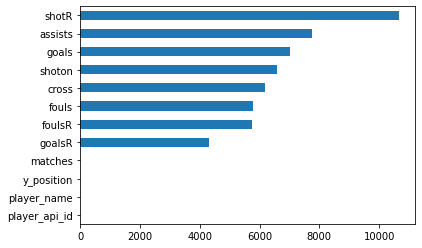

In [262]:
player.isna().sum().sort_values().plot(kind="barh")

Esto es debido a que utilizando el left join, en caso de no encontrar el indice en la tabla derecha, se reemplaza con un nan, pero esto se debe netamente a que por ejemplo, Lionel Messi no puede recibir tiros al arco, debido a que no es arquero, por lo que se reemplazan los nans con cero.

In [263]:
player = player.fillna(0)

Con esta información se crea la tabla **player_features** que contiene las caracteristicas de los jugadores que permitirán evaluarlos.

In [264]:
player.head()

,player_api_id,player_name,y_position,matches,goals,goalsR,fouls,foulsR,assists,cross,shoton,shotR
0,505942,Aaron Appindangoye,DF,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155782,Aaron Cresswell,DF,75,4.0,97.0,40.0,72.0,8.0,225.0,22.0,0.0
2,162549,Aaron Doran,MC,104,0.0,0.0,2.0,5.0,0.0,1.0,0.0,0.0
3,30572,Aaron Galindo,DF,10,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23780,Aaron Hughes,DF,162,1.0,200.0,37.0,71.0,0.0,30.0,12.0,0.0


Se estudiarán solo los jugadores con más de 10 partidos disputados, esto con el objetivo de evitar tener por ejemplo un jugador con 3 goles por partido, siendo que solo ha jugado un partido

In [265]:
# Se crean las features según lo comentado anteriormente siguiendo la misma sintaxis
player_features = player[player.matches>20][["player_api_id","player_name", "y_position"]]
player_features["goalsR_per_match"] = player["goalsR"]/player["matches"]
player_features["blocks_per_match"] = (player["shotR"] - player["goalsR"])/player["matches"] #Bloqueos = Tiros recibidos - goles recibidos
player_features["fouls_per_match"] = player["fouls"]/player["matches"]
player_features["asst_per_match"] = player["assists"]/player["matches"]
player_features["cross_per_match"] = player["assists"]/player["matches"]
player_features["foulsR_per_match"] = player["foulsR"]/player["matches"]
player_features["precision"] = player["goals"]/(player["shoton"]+player["goals"]) # Goles también son tiros al arco
player_features["goals_per_match"] = player["goals"]/player["matches"]
player_features["log_matches"] = np.log(player["matches"])

player_features.head()


,player_api_id,player_name,y_position,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches
1,155782,Aaron Cresswell,DF,1.293333,-1.293333,0.533333,0.106667,0.106667,0.960000,0.153846,0.053333,4.317488
2,162549,Aaron Doran,MC,0.000000,0.000000,0.019231,0.000000,0.000000,0.048077,NaN,0.000000,4.644391
4,23780,Aaron Hughes,DF,1.234568,-1.234568,0.228395,0.000000,0.000000,0.438272,0.076923,0.006173,5.087596
5,27316,Aaron Hunt,MC,1.626582,-1.626582,0.379747,0.069620,0.069620,0.708861,0.447059,0.240506,5.062595
7,30895,Aaron Lennon,MC,1.226519,-1.226519,0.541436,0.193370,0.193370,1.287293,0.189781,0.143646,5.198497


blocks_per_match puede ser negativa, basicamente porque los jugadores que no son arqueros tienen la feature goalsR (goles recibido) igual a 0.

La feature precision toma el valor nan en caso de que el jugador no tenga tiros al arco y tampoco goles, por lo que nuevamente se reemplazarán los nans por 0.

En caso de que solo tenga los tiros al arco igual a 0, significa que la precision toma valor infinito, por lo que se reemplazará ese valor por 0 simplemente.


In [266]:
player_features = player_features.fillna(0)
player_features = player_features.replace([float('inf')], 0)

In [267]:
# Estadísticas de los datos para poder identificar outliers
player_features.describe()

,player_api_id,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches
count,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000
mean,119417.753977,0.756202,-0.469281,0.378746,0.028448,0.028448,0.337754,0.195351,0.061829,4.103431
std,123614.800418,0.671500,1.556237,0.500568,0.052355,0.052355,0.477987,0.274097,0.112846,0.644772
min,2752.000000,0.000000,-2.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.044522
25%,32931.000000,0.000000,-1.335570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.555348
50%,46836.000000,0.803828,-0.620000,0.130435,0.000000,0.000000,0.111111,0.000000,0.000000,4.077537
75%,178753.000000,1.370370,0.000000,0.640000,0.037037,0.037037,0.524590,0.312500,0.068966,4.605170
max,698273.000000,2.480000,12.409091,3.730769,0.565217,0.565217,3.833333,1.000000,1.132530,5.703782


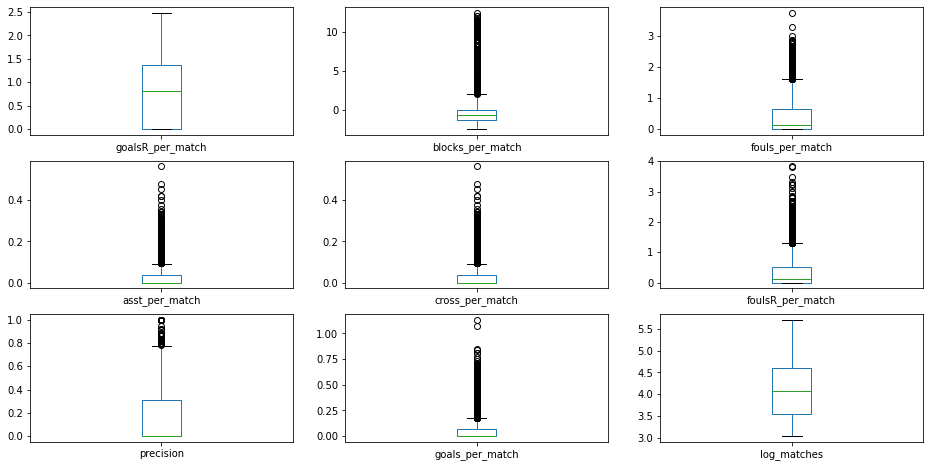

In [268]:
# Boxplots de los atributos
fig, ax = plt.subplots(3,3, figsize = (16,8))
ax = ax.flatten()
for i, col in enumerate(player_features.columns[3:]):
    player_features[col].plot(kind="box", ax = ax[i])

# Bonus
¿Cuál es tu sugerencia de jugadores para armar el mejor equipo de la historia? Argumenta tu respuesta.

Como **primera aproximación**, y sin ocupar los datos anteriormente creados se propone lo siguiente:

Se puede notar en la tabla Player, que existe una columna denominada *overall_ranking* es decir, una métrica que dice qué tan bueno es el jugador, como primera solución, puede ser considerar los mejores jugadores de acuerdo a esta métrica y construir el equipo de acuerdo a tal criterio, para ello:

* Se realiza una consulta para identificar cuáles han sido los mejores jugadores
* Se plantea una formación, en este caso simplemente se asumirá un 4-3-3 (4 defensas, 3 mediocampistas y 3 delanteros)
* Se busca a partir de la consulta realizada los 3 mejores delanteros (escogiendo un delantero izquierdo, uno derecho y un delantero centro) y se realiza lo analogo para los mediocampistas, defensas y arquero.

Se pudo notar que además este *overall_score* existe para diferente epocas del año, debido a que se quiere encontrar el mejor equipo de la historia, se escogerá el mejor *overall_score* historico de cada jugador.

In [269]:
best_scores = query("""
      SELECT P.player_api_id, P.date, MAX(P.overall_rating), B.player_name
      FROM Player_Attributes P
      LEFT JOIN Player B
      on P.player_api_id=B.player_api_id
      GROUP BY player_name
      ORDER BY overall_rating DESC
      """)
best_scores = best_scores.merge(y_position_mean, how="inner", on="player_api_id")
best_scores.head()

,player_api_id,date,MAX(P.overall_rating),player_name,y_position
0,30981,2015-12-17 00:00:00,94,Lionel Messi,DEL
1,30893,2015-10-16 00:00:00,93,Cristiano Ronaldo,DEL
2,30717,2007-02-22 00:00:00,93,Gianluigi Buffon,ARQ
3,30829,2007-02-22 00:00:00,93,Wayne Rooney,DEL
4,39989,2007-02-22 00:00:00,92,Gregory Coupet,ARQ


In [270]:
# Mejor arquero
best_scores[best_scores.y_position=="ARQ"].sort_values("MAX(P.overall_rating)", ascending=False).head(1)

,player_api_id,date,MAX(P.overall_rating),player_name,y_position
2,30717,2007-02-22 00:00:00,93,Gianluigi Buffon,ARQ


In [271]:
# Mejores defensas
best_scores[best_scores.y_position=="DF"].sort_values("MAX(P.overall_rating)", ascending=False).head(41)

,player_api_id,date,MAX(P.overall_rating),player_name,y_position
6,30723,2007-08-30 00:00:00,91,Alessandro Nesta,DF
10,30627,2007-02-22 00:00:00,91,John Terry,DF
8,34520,2007-02-22 00:00:00,91,Fabio Cannavaro,DF
26,30661,2007-02-22 00:00:00,89,Carles Puyol,DF
28,30931,2007-08-30 00:00:00,89,Cris,DF
33,39774,2007-02-22 00:00:00,89,Lucio,DF
34,30865,2012-08-31 00:00:00,89,Nemanja Vidic,DF
57,30716,2007-08-30 00:00:00,88,Marco Materazzi,DF
64,80562,2015-09-21 00:00:00,88,Thiago Silva,DF
61,30620,2007-08-30 00:00:00,88,Rio Ferdinand,DF


In [272]:
best_scores[best_scores.y_position=="MC"].sort_values("MAX(P.overall_rating)", ascending=False).head(10)

,player_api_id,date,MAX(P.overall_rating),player_name,y_position
5,39854,2011-08-30 00:00:00,92,Xavi Hernandez,MC
7,30955,2012-02-22 00:00:00,91,Andres Iniesta,MC
13,30834,2015-09-25 00:00:00,90,Arjen Robben,MC
16,30924,2014-02-28 00:00:00,90,Franck Ribery,MC
17,30631,2007-02-22 00:00:00,90,Frank Lampard,MC
18,41044,2008-08-30 00:00:00,90,Kaka,MC
23,38843,2007-02-22 00:00:00,90,Ze Roberto,MC
27,30613,2012-02-22 00:00:00,89,Cesc Fabregas,MC
38,30618,2007-08-30 00:00:00,89,Steven Gerrard,MC
54,30696,2007-02-22 00:00:00,88,Luis Figo,MC


In [273]:
best_scores[best_scores.y_position=="DEL"].sort_values("MAX(P.overall_rating)", ascending=False).head(10)

,player_api_id,date,MAX(P.overall_rating),player_name,y_position
0,30981,2015-12-17 00:00:00,94,Lionel Messi,DEL
3,30829,2007-02-22 00:00:00,93,Wayne Rooney,DEL
1,30893,2015-10-16 00:00:00,93,Cristiano Ronaldo,DEL
11,30743,2007-08-30 00:00:00,91,Ronaldinho,DEL
12,30626,2007-08-30 00:00:00,91,Thierry Henry,DEL
21,19533,2016-02-04 00:00:00,90,Neymar,DEL
22,22543,2013-09-20 00:00:00,90,Radamel Falcao,DEL
24,35724,2014-10-17 00:00:00,90,Zlatan Ibrahimovic,DEL
19,40636,2015-10-16 00:00:00,90,Luis Suarez,DEL
15,30714,2007-02-22 00:00:00,90,Francesco Totti,DEL


Al identificar las posiciones de los jugadores se concluye que el mejor equipo, siguiendo tal metodología corresponde a:

Delanteros: Cristiano Ronaldo, Luis Suarez, Lionel Messi

Medio Campo: Iniesta, Lampard, Xavi Hernandez

Defensas: Patrice Evra, Alejandro Nesta, Cannavaro, Philip Lahm

Arquero: Buffon


Como **Segunda aproximación**, es posible considerar todos lo datos que se tienen hasta la fecha, de manera de encontrar los jugadores que en los años que se tienen registrados, tienen las mejores estadisticas. Esto tiene una desventaja, pues puede suceder que exista un jugador que haya tenido una excelente temporada, pero que en el resto de los años haya jugado mal.

Para esta solución del problema, se hace tremendamente útil la tabla creada **player_features**, pues resume caracteristicas interesantes de los jugadores desde que se tiene registro.

La manera en que se evaluara cada jugador depende de la posición en que juege, esto se define a partir de la función score, la cual recibe una fila de la tabla *player_features* y retorna su evaluación, en la siguiente celda se define,


In [274]:
def score(X):
    if X.y_position == "ARQ":
        score = (-0.8*X.goalsR_per_match + 0.2*X.blocks_per_match)/(X.log_matches+0.1)
    elif X.y_position == "DF":
        score = (-0.8*X.goalsR_per_match-0.2*X.fouls_per_match)/(X.log_matches+0.1)
    elif X.y_position == "MC":
        score = (0.3*X.asst_per_match - 0.2*X.goalsR_per_match+0.3*X.goals_per_match+0.1*X.cross_per_match+0.1*X.foulsR_per_match)*(X.log_matches+0.1)
    elif X.y_position == "DEL":
        score = (0.1*X.asst_per_match + 0.7*X.goals_per_match + 0.1*X.precision + 0.1*X.foulsR_per_match)*(X.log_matches+0.1)
    return score

En general se le da un peso a cada atributo dependiendo de la importancia que tiene para la posición, en caso de ser un atributo negativo (goles recibidos) se le da un peso negativo. Notar que se multiplica/divide (dependiendo si mientras más alto es el score mejor, o al revés) por (log_matches+0.1) que de alguna manera nos dice la experiencia que tiene el jugador.

Por último para que las features sean comparables, se normalizan entre 0 y 1 utilizando la función minmax_scale de sklearn

In [275]:
# Seleccionar solo las columnas númericas
player_features_num = player_features.select_dtypes(['int', 'float'])

# Normalizarlas
player_features_norm = minmax_scale(player_features_num)

# Reemplazar los valores no normalizados por los normalizados
player_features[player_features_num.columns] = player_features_norm

player_features.head()

,player_api_id,player_name,y_position,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches
1,155782,Aaron Cresswell,DF,0.521505,0.079700,0.142955,0.188718,0.188718,0.250435,0.153846,0.047092,0.478692
2,162549,Aaron Doran,MC,0.000000,0.166565,0.005155,0.000000,0.000000,0.012542,0.000000,0.000000,0.601622
4,23780,Aaron Hughes,DF,0.497810,0.083647,0.061219,0.000000,0.000000,0.114332,0.076923,0.005450,0.768287
5,27316,Aaron Hunt,MC,0.655880,0.057318,0.101788,0.123174,0.123174,0.184920,0.447059,0.212362,0.758885
7,30895,Aaron Lennon,MC,0.494564,0.084188,0.145127,0.342116,0.342116,0.335816,0.189781,0.126837,0.809990


Se calcula ahora sí el score

In [276]:
player_features["score"] = player_features.apply(score, axis=1)

Se buscan los mejores jugadores de forma analoga a lo realizado en la aproximación anterior.

In [277]:
player_features[player_features.y_position=="ARQ"].sort_values("score", ascending=False).head(5)

,player_api_id,player_name,y_position,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches,score
10678,210046,Vladan Giljen,ARQ,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33313
6804,40186,Mario Felgueiras,ARQ,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33313
7114,110382,Matias Omar Degra,ARQ,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33313
1290,16199,Boban Bajkovic,ARQ,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.017494,0.28353
1113,37839,Bart Deelkens,ARQ,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.017494,0.28353


In [278]:
player_features[player_features.y_position=="DF"].sort_values("score", ascending=False).head(10)

,player_api_id,player_name,y_position,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches,score
3578,38626,Frederic Page,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.597988,-0.0
2623,303227,Diego Galo,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.555518,-0.0
9338,94467,Ryan McGowan,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.502961,-0.0
8046,39627,Nuno Andre Coelho,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.407110,-0.0
9309,32411,Russell Anderson,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.413127,-0.0
2665,148313,Dimitri Daeselaire,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.223018,-0.0
9293,500618,Rui Correia,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.302951,-0.0
2678,277848,Dino Arslanagic,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.223018,-0.0
8051,164470,Nuno Henrique,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.146456,-0.0
2697,139898,Dirceu,DF,0.0,0.166565,0.0,0.0,0.0,0.0,0.0,0.0,0.065565,-0.0


In [279]:
player_features[player_features.y_position=="MC"].sort_values("score", ascending=False).head(10)

,player_api_id,player_name,y_position,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches,score
794,46509,Angel Di Maria,MC,0.258717,0.123472,0.092962,0.664740,0.664740,0.214124,0.212500,0.173533,0.792991,0.256846
2410,37459,David Silva,MC,0.371637,0.104663,0.251983,0.587026,0.587026,0.331797,0.176692,0.191244,0.878205,0.245565
1642,30613,Cesc Fabregas,MC,0.405084,0.099092,0.234690,0.578873,0.578873,0.266880,0.248908,0.231935,0.878205,0.241422
948,30834,Arjen Robben,MC,0.339406,0.110032,0.142698,0.369120,0.369120,0.350954,0.328185,0.539951,0.710706,0.224442
3540,30631,Frank Lampard,MC,0.335633,0.110660,0.184375,0.429524,0.429524,0.206585,0.214099,0.418522,0.792991,0.224050
10227,116772,Thomas Mueller,MC,0.276963,0.120433,0.196293,0.357420,0.357420,0.256917,0.362550,0.405813,0.843748,0.221791
7316,36378,Mesut Oezil,MC,0.401350,0.099714,0.107216,0.567800,0.567800,0.230536,0.284810,0.184810,0.874723,0.219650
3656,31921,Gareth Bale,MC,0.444939,0.092454,0.146564,0.427056,0.427056,0.325123,0.243017,0.378419,0.853126,0.217191
3510,30924,Franck Ribery,MC,0.301694,0.116313,0.177409,0.445490,0.445490,0.371598,0.376623,0.368437,0.710706,0.215281
7776,40945,Nani,MC,0.287546,0.118670,0.248268,0.609079,0.609079,0.325018,0.151316,0.166463,0.661650,0.204551


In [280]:
player_features[player_features.y_position=="DEL"].sort_values("score", ascending=False).head(10)

,player_api_id,player_name,y_position,goalsR_per_match,blocks_per_match,fouls_per_match,asst_per_match,cross_per_match,foulsR_per_match,precision,goals_per_match,log_matches,score
6169,30981,Lionel Messi,DEL,0.312540,0.114507,0.138865,0.632376,0.632376,0.438973,0.391123,1.000000,0.929932,0.871577
1992,30893,Cristiano Ronaldo,DEL,0.358077,0.106922,0.165585,0.444015,0.444015,0.424039,0.325909,0.947753,0.944739,0.817846
11041,35724,Zlatan Ibrahimovic,DEL,0.298559,0.116836,0.325071,0.376432,0.376432,0.218686,0.373106,0.740199,0.908171,0.619987
3932,25759,Gonzalo Higuain,DEL,0.409127,0.098419,0.206588,0.293433,0.293433,0.199788,0.405868,0.714997,0.856813,0.564909
9659,37412,Sergio Aguero,DEL,0.467085,0.088765,0.191631,0.304212,0.304212,0.329333,0.322718,0.607298,0.885073,0.512962
2860,49677,Edinson Cavani,DEL,0.388042,0.101931,0.114394,0.118442,0.118442,0.129889,0.492212,0.583727,0.914518,0.489670
892,27734,Antonio Di Natale,DEL,0.512003,0.081283,0.037401,0.164580,0.164580,0.071587,0.508651,0.603711,0.874723,0.484515
9025,93447,Robert Lewandowski,DEL,0.335212,0.110730,0.229288,0.191844,0.191844,0.254584,0.401993,0.643617,0.777459,0.469769
9083,30843,Robin van Persie,DEL,0.457146,0.090421,0.345960,0.514311,0.514311,0.288170,0.279518,0.595497,0.790811,0.467719
6369,40636,Luis Suarez,DEL,0.325474,0.112352,0.277657,0.444291,0.444291,0.411776,0.271762,0.506822,0.888461,0.462163


Con esto, el mejor 11 de la historia, segun este criterio sería

Cristiano Ronaldo, Zlatan Ibrahimovic, Lionel Messi

David Silva, Frank Lampard, Di Maria

Maxwell, T. Silva, Bonucci, Philip Lahm

Se decidió realizar esta segunda aproximación solamente ocupando los features creados, esto con el objetivo de simular cómo a partir de datos crudos, poder extraer información, en este caso de la calidad de los jugadores de futbol.

Una forma de poder mejorar esto ultimo, es seguir creando más características de los jugadores y mejorar el tipo de evaluación, esto es posible a través del trabajo colaborativo con expertos en el área.

Además cabe destacar que también es posible realizar una revisión bibliográfica acerca del problema e implementarla con estos datos, pero consideré más valioso proponer una solución desde cero.

Por ultimo y solo como idea, seria interesante construir un modelo que prediga la resultado entre dos equipos (los datos existen) y luego encontrar el optimo de jugadores a través de algún algoritmo de optimización.